In [6]:
# Celem analizy jest wyliczenie średniej liczby produktów występującej w zamówieniu wg reprezentujących kategorii dwoma sposobami.
# Pierwszy sposób przedstawia bezpośrednią średnią, natomiast drugi bierze pod uwagę fakt, że produkty mogą być rozłożone w kilku
# liniach zamówienia.

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

In [7]:
# Wczytanie danych
orderLines = pd.read_csv('orderlines.csv', sep=";")
orders = pd.read_csv('orders.csv', sep=";", encoding='latin-1') 
customers = pd.read_csv('customers.csv', sep=";")
products = pd.read_csv('products.csv', sep=";")

In [8]:
# Połączenie tabel orderLines i products za pomocą kolumny productid
mergedOP = orderLines.merge(products, on = 'productid')

In [9]:
mergedOP.head(n=5)

,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice,productname,productgroupcode,productgroupname,instockflag,fullprice
0,1010561,1006414,10834,2011-03-07 00:00,2011-03-08 00:00,18.0,1,18.0,NaN,BK,BOOK,N,25
1,1010589,1008588,10834,2011-03-08 00:00,2011-03-09 00:00,18.0,1,18.0,NaN,BK,BOOK,N,25
2,1010626,1010317,10834,2010-12-09 00:00,2010-12-10 00:00,25.0,1,25.0,NaN,BK,BOOK,N,25
3,1010628,1010318,10834,2010-12-09 00:00,2010-12-10 00:00,25.0,2,50.0,NaN,BK,BOOK,N,25
4,1010666,1009198,10834,2010-12-09 00:00,2010-12-10 00:00,25.0,1,25.0,NaN,BK,BOOK,N,25


In [33]:
# Wyliczenie średniej pierwszym sposobem
directMean = mergedOP.groupby(['productgroupname']).numunits.mean().reset_index()
directMean['numunits'] = directMean['numunits'].round(2)
directMean = directMean.rename(columns = {'numunits':'Orderline average'})

#Przefiltrowanie wyników i wyświetlenie grup produktów wg najwyższej średniej
directMean = directMean.sort_values(by = "Orderline average", ascending=False)
directMean.head(n=10)

,productgroupname,Orderline average
7,OTHER,2.30
6,OCCASION,1.79
3,CALENDAR,1.64
2,BOOK,1.56
4,FREEBIE,1.51
5,GAME,1.46
0,APPAREL,1.39
1,ARTWORK,1.20


In [16]:
# Wyliczenie średniej drugim sposobem, który bierze pod uwagę, że dane produkty mogą być umiejscowione w wielu liniach zamówienia.

# Najpierw grupujemy tablę po ID zamówienia i produktu, następnie agregujemy sumę 'numunits' oraz grupę produktu
groupedMean = mergedOP.groupby(['orderid','productid']).agg({'numunits': 'sum', 'productgroupname':'min'})

# Wyliczamy średnią z rozszerzonego zapytania
indirectMean = groupedMean.groupby('productgroupname').numunits.mean().reset_index()
indirectMean['numunits'] = indirectMean['numunits'].round(2)

# Złączamy powstałe DataFrame, następnie wyliczamy procentową różnicę pomiędzy wyliczonymi średnimi.
means = indirectMean.merge(directMean, on='productgroupname')
means['Percentage diff'] = (((means['numunits_x'] /  means['numunits_y']) - 1) * 100).round(2)
means = means.rename(columns = {'numunits_x':'Order average', 'numunits_y' : 'Orderline average', 'productgroupname':'Product group'})
means

,Product group,Order average,Orderline average,Percentage diff
0,APPAREL,1.42,1.39,2.16
1,ARTWORK,1.26,1.20,5.00
2,BOOK,1.59,1.56,1.92
3,CALENDAR,1.67,1.64,1.83
4,FREEBIE,1.53,1.51,1.32
5,GAME,1.49,1.46,2.05
6,OCCASION,1.82,1.79,1.68
7,OTHER,2.44,2.30,6.09


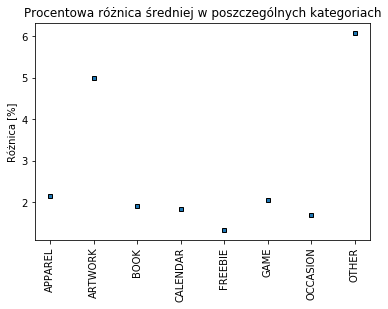

In [34]:
# Rysowanie wykresu

fig, ax = plt.subplots()
ax.plot(means['Product group'], means['Percentage diff'], ls='none', mec='black', marker='s', markersize=4)
ax.set_ylabel('Różnica [%]')
ax.set_title('Procentowa różnica średniej w poszczególnych kategoriach')
#Rotacja osi X, tak aby były czytelne kategorie produktów
plt.xticks(rotation=90)
#Wyświetlenie wykresu
plt.show()